# LB3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

## PART 1 DATA

Загрузка и первичная подготовка датасета.

In [104]:
all_data = pd.read_csv("data/dataset_group.csv", header=None)
all_data.head()

,0,1,2
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose


In [105]:
unique_id = list(set(all_data[1]))
len(unique_id)

1139

In [106]:
items = list(set(all_data[2]))
len(items)

38

In [107]:
dataset = [[elem for elem in all_data[all_data[1] == id][2]
            if elem in items] for id in unique_id]

## PART 2 PREPROCESSING

Необходимо представить данные в виде матрицы.

In [108]:
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True


Данные теперь представляются в виде матрицы: строки - транзакции,
столбцы - наличие в транзакции элемента, ячейка - есть/нет в транзации

## PART 3 APRIORI

После подготовки данных можно воспользоваться алгоритмом Априори

Запуск Априори с минимальным уровнем поддержки 0.3

In [109]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.384548,(aluminum foil),1
2,0.385426,(bagels),1
3,0.374890,(beef),1
4,0.367867,(butter),1
5,0.395961,(cereals),1
6,0.390694,(cheeses),1
7,0.379280,(coffee/tea),1
8,0.388938,(dinner rolls),1
9,0.388060,(dishwashing liquid/detergent),1


Была получена таблица, в которой перечисленны все повторяющиеся элементы
с вероятностью больше 0.3. В последнем столбце показана длина повторяющегося
набора.

Применим Априори, но с ограничением на размер набора, равным 1

In [110]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


Применим Априори и выведем только наборы с размером 2, а также
количество таких наборов

In [111]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print(results)
print('\nCount of result itemstes = ',len(results))

     support                                    itemsets  length
38  0.310799                 (aluminum foil, vegetables)       2
39  0.300263                        (vegetables, bagels)       2
40  0.310799                       (vegetables, cereals)       2
41  0.309043                       (cheeses, vegetables)       2
42  0.308165                  (dinner rolls, vegetables)       2
43  0.306409  (dishwashing liquid/detergent, vegetables)       2
44  0.326602                          (vegetables, eggs)       2
45  0.302897                     (ice cream, vegetables)       2
46  0.309043             (laundry detergent, vegetables)       2
47  0.311677                    (lunch meat, vegetables)       2
48  0.331870                       (poultry, vegetables)       2
49  0.305531                          (vegetables, soda)       2
50  0.315189                       (waffles, vegetables)       2
51  0.319579                        (yogurt, vegetables)       2

Count of result itemstes

Посчитаем количество наборов при различных уровнях поддержки.
Начальное значение поддержки 0.05, шаг 0.01.
Определите значение уровня поддержки при котором перестают
генерироваться наборы размера 1,2,3, и.т.д.

In [112]:
min_support = 0.05
max_support = 0.8
step_support = 0.01

support_len = dict()
support_len_not_in_N = dict()

prev = 1000

for support in np.arange(min_support, max_support, step_support):
    results = apriori(df, min_support=support, use_colnames=True)
    support_len[support] = len(results)

    if len(results) == 0:
        continue

    results['length'] = results['itemsets'].apply(lambda x: len(x))

    cur_max = np.max(results['length'])

    if cur_max < prev:
        support_len_not_in_N[support] = prev
        prev = cur_max

support_len_not_in_N.pop(min_support)

1000

Постройте график зависимости количества наборов от уровня поддержки
Отметьте полученные уровни поддержки на графике

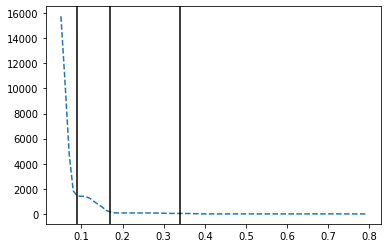

In [113]:
plt.plot(support_len.keys(), support_len.values(), '--')
for key in support_len_not_in_N.keys():
    plt.axvline(key, color='k')

Построим датасет только из тех элементов,
которые попадают в наборы размером 1 при уровне поддержки 0.38

In [114]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [ list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2]
                if elem in new_items] for id in unique_id]


Приведем полученный датасет к формату, который можно обработать

In [115]:
te = TransactionEncoder()
te_ary = te.fit_transform(new_dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,aluminum foil,bagels,cereals,cheeses,dinner rolls,dishwashing liquid/detergent,eggs,ice cream,lunch meat,milk,poultry,soda,vegetables,waffles,yogurt
0,True,False,False,False,True,False,False,True,True,False,False,True,True,False,True
1,True,False,True,True,False,True,False,False,False,True,False,False,True,True,True
2,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False
3,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True


Проведем ассоциативный анализ при уровне поддержки 0.3 для нового датасета.
Опишите в чем сходства и различия

In [116]:
results = apriori(df, min_support=0.3, use_colnames=True)
results


,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
5,0.388060,(dishwashing liquid/detergent)
6,0.389816,(eggs)
7,0.398595,(ice cream)
8,0.395083,(lunch meat)
9,0.380158,(milk)


Проведем ассоциативный анализ при уровне поддержки 0.15 для нового датасета.
Выведем все наборы размер которых больше 1 и в котором есть 'yogurt' или 'waffles'

In [117]:
results = apriori(df, min_support=0.15, use_colnames=True)
results[['yogurt' in results["itemsets"][i] or 'waffles' in results["itemsets"][i] for i in range(len(results["itemsets"]))]]

,support,itemsets
13,0.394205,(waffles)
14,0.384548,(yogurt)
27,0.169447,"(aluminum foil, waffles)"
28,0.177349,"(aluminum foil, yogurt)"
40,0.159789,"(waffles, bagels)"
41,0.162423,"(yogurt, bagels)"
52,0.160667,"(waffles, cereals)"
53,0.172081,"(yogurt, cereals)"
63,0.172959,"(waffles, cheeses)"
64,0.172081,"(cheeses, yogurt)"


Построим датасет, из тех элементов, которые не попали в
датасет в п. 6 и приведем его к удобному для анализа виду

In [118]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [ list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2]
                if not elem in new_items] for id in unique_id]

In [119]:
te = TransactionEncoder()
te_ary = te.fit_transform(new_dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,all- purpose,beef,butter,coffee/tea,flour,fruits,hand soap,individual meals,juice,ketchup,...,pasta,pork,sandwich bags,sandwich loaves,shampoo,soap,spaghetti sauce,sugar,toilet paper,tortillas
0,True,True,True,False,True,False,False,False,False,False,...,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,True,False,False,True,...,False,True,False,True,True,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,True,False,True,True,False,False,...,True,True,False,True,False,False,True,False,True,True


Проведем анализ Apriori для полученного датасета

In [120]:
results = apriori(df, min_support=0.1, use_colnames=True)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.374890,(beef)
2,0.367867,(butter)
3,0.379280,(coffee/tea)
4,0.352941,(flour)
...,...,...
271,0.151888,"(spaghetti sauce, toilet paper)"
272,0.148376,"(spaghetti sauce, tortillas)"
273,0.151888,"(toilet paper, sugar)"
274,0.147498,"(sugar, tortillas)"


Напишем правило, для вывода всех наборов,
в которых хотя бы два элемента начинаются на 's'

In [121]:
[ elem for elem in results['itemsets'] if len(elem) >= 2 and list(elem)[0][0]=='s' and list(elem)[1][0]=='s']

[frozenset({'sandwich bags', 'sandwich loaves'}),
 frozenset({'sandwich bags', 'shampoo'}),
 frozenset({'sandwich bags', 'soap'}),
 frozenset({'sandwich bags', 'spaghetti sauce'}),
 frozenset({'sandwich bags', 'sugar'}),
 frozenset({'sandwich loaves', 'shampoo'}),
 frozenset({'sandwich loaves', 'soap'}),
 frozenset({'sandwich loaves', 'spaghetti sauce'}),
 frozenset({'sandwich loaves', 'sugar'}),
 frozenset({'shampoo', 'soap'}),
 frozenset({'shampoo', 'spaghetti sauce'}),
 frozenset({'shampoo', 'sugar'}),
 frozenset({'soap', 'spaghetti sauce'}),
 frozenset({'soap', 'sugar'}),
 frozenset({'spaghetti sauce', 'sugar'})]

Напишем правило, для вывода всех наборов, для
которых уровень поддержки изменяется от 0.1 до 0.25

In [122]:
a = results["support"] < 0.25
b = results["support"] > 0.1
results[a & b]

,support,itemsets
23,0.144864,"(beef, all- purpose)"
24,0.147498,"(all- purpose, butter)"
25,0.146620,"(coffee/tea, all- purpose)"
26,0.142230,"(all- purpose, flour)"
27,0.150132,"(fruits, all- purpose)"
...,...,...
271,0.151888,"(spaghetti sauce, toilet paper)"
272,0.148376,"(spaghetti sauce, tortillas)"
273,0.151888,"(toilet paper, sugar)"
274,0.147498,"(sugar, tortillas)"
